# Functions

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import matplotlib.colors as mcolors
import pandas as pd

In [25]:
#-----------------------------------------#
#             Bulk Spectral               #
#-----------------------------------------#
def plot_emp_evals_bulk(empirical_bulk_distribution, bins, ax):
       bin_centers = (bins[1]-bins[0])/2 + bins[:-1]
       w = (bins[1]-bins[0])
       ax.bar(bin_centers, 
              empirical_bulk_distribution, 
              width=w, 
              color='k', 
              alpha=.3)
       return

def plot_pred_evals_bulk(predicted_bulk_distribution, bins, ax):
       predicted_bulk_distribution[0] = 0
       predicted_bulk_distribution[-1] = 0
       ax.plot(bins, predicted_bulk_distribution, 'k')       
       return

def plot_emp_evals_isolated(emp_bnd, emp_lam, bar_width, bar_height, ax):
       w = bar_width
       h = bar_height
       # ax.bar(emp_bnd, height=h, width=w, color='r')
       # ax.annotate(f'$\\lambda_b$',
       #               xy=(emp_bnd, h*1.08),
       #               ha='center',
       #               va='bottom',
       #               fontsize=12,
       #               color='r')
       labels = ['$\\lambda_1$', '$\\lambda_2$', '$\\lambda_3$']
       for i, lam in enumerate(reversed(emp_lam)):
              ax.bar(lam, height=h, width=w, color=colors[i])
              ax.annotate(labels[i],
                            xy=(lam, h*1.08),
                            ha='center',
                            va='bottom',
                            fontsize=12,
                            color=colors[i])
       return

def plot_boundry(emp_bndry, bar_height, bar_width, ax):
       w = bar_width
       h = bar_height
       ax.bar(emp_bnd, height=h, width=w, color='r')
       ax.annotate(f'$\\lambda_b$',
                     xy=(emp_bnd, h*1.08),
                     ha='center',
                     va='bottom',
                     fontsize=12,
                     color='r')

def plot_pred_eval_isolated(predicted_boundary, predicted_lambdas, ax):
       ax.plot(predicted_boundary, .1, '+', color='r')
       for i in range(len(predicted_lambdas)):
              ax.plot(predicted_lambdas[i], .1, '+', color=colors[i])
       return

def plot_shading_evals(emp_bndry, emp_lambdas, ax):
       lam_1 = emp_lambdas[np.argmax(abs(emp_lambdas-emp_bndry>1))]
       ax.axvspan(lam_1, emp_bndry, color='g', alpha=.3)
       return



#-----------------------------------------#
#             Eigenvalues                 #
#-----------------------------------------#
def plot_emp_evals_vs_size(sizes, all_emp_bndry, all_emp_lambdas, ax):
       ax.plot(sizes, all_emp_bndry, 'x', color=colors[0], label=f'$\\lambda_b$')
       labels = ['$\\lambda_3$', '$\\lambda_2$', '$\\lambda_1$']
       for i, lam in enumerate(all_emp_lambdas.T):
               ax.plot(sizes, lam, 'x', color=colors[i+1], label=labels[i])

def plot_pred_evals_vs_size(sizes, all_pred_bndry, all_pred_lambdas, ax):
       ax.plot(sizes, all_pred_bndry, color=colors[0])
       for i, lam in enumerate(all_pred_lambdas.T):
              ax.plot(sizes, lam, color=colors[i+1])

def plot_shading_evals_vs_size(sizes, all_pred_bndry, all_pred_lambdas, ax):
       ax.fill_between(sizes, all_pred_bndry, all_pred_lambdas[:,0], color='g', alpha=.3)


#-----------------------------------------#
#             Eigenvectors                #
#-----------------------------------------#

def plot_emp_evecs(emp_bndry, emp_lambdas, emp_evecs, ax, alpha):
       idx = 1
       labels = [r'$u^{(3)}$', r'$u^{(2)}$', r'$u^{(1)}$']
       for i, lam in enumerate(emp_lambdas):
              if abs(lam)-emp_bndry > 1:
                     vec = emp_evecs[:,i]
                     vec = fix_sign(vec)
                     ax.plot(vec, 'x', color=colors[idx+1], alpha=alpha, label=labels[idx])
                     idx += 1

def plot_pred_evecs(pred_bndry, pred_lambdas, pred_evecs, ax):
       idx = 1
       for i, lam in enumerate(pred_lambdas):
              if abs(lam)-pred_bndry > .1:
                     vec = pred_evecs[:,i]
                     vec = fix_sign(vec)
                     ax.plot(vec, color=colors[idx+1], alpha=1)
                     idx += 1      



#-----------------------------------------#
#             Inner Products              #
#-----------------------------------------#

def plot_emp_ips(sizes, all_emp_ips, ax):
       ax.plot(sizes, all_emp_ips, 'x', label='Emperical', color='#1f77b4')

def plot_pred_ips(sizes, all_pred_ips, ax):
       ax.plot(sizes, all_pred_ips, label='Predicted', color='#1f77b4')

#-----------------------------------------#
#             Loading Data               #
#-----------------------------------------#

def load_emp_spectra_bulk(filepath, filename):
       emp_blk_spct = np.load(filepath + filename + f'_emp_blk_spct.npy')
       emp_blk_bins = np.load(filepath + filename + f'_emp_blk_bins.npy')
       return emp_blk_spct, emp_blk_bins

def load_emp_spectra_isolated(filepath, filename):
       emp_bndry = np.load(filepath + filename + f'_emp_boundaries.npy')
       emp_lambdas = np.load(filepath + filename + f'_emp_lambdas.npy')
       emp_evecs = np.load(filepath + filename + f'_emp_evecs.npy')
       return emp_bndry, emp_lambdas, emp_evecs


def load_pred_spectra_bulk(filepath, filename): 
       pred_blk_spct = np.load(filepath + filename + f'_pred_blk_spct.npy')
       return pred_blk_spct


def load_pred_spectra_isolated(filepath, filename):
       pred_bndry = np.load(filepath + filename + f'_pred_boundaries.npy')
       pred_lambdas = np.load(filepath + filename + f'_pred_lambdas.npy')
       pred_evecs = np.load(filepath + filename + f'_pred_evecs.npy')
       return pred_bndry, pred_lambdas, pred_evecs

def load_inner_products(filepath, filename):
       emp_ips = np.load(filepath + filename + f'_emp_ips.npy')
       pred_ips = np.load(filepath + filename + f'_pred_ips.npy')
       return emp_ips, pred_ips

def collect_eigenvalues(filepath, sizes, prob_in, prob_out, mat_type):
       if mat_type == 'A':
              idx = 1
       if mat_type == 'B1' or mat_type == 'B':
              idx = 2
       if mat_type == 'B2':
              idx = 3
       all_emp_bndry = []
       all_emp_lambdas = []
       all_pred_bndry = []
       all_pred_lambdas = []
       for i, K in enumerate(sizes):
              filename = f'/{K}_{prob_in}_{prob_out}_{mat_type}'
              emp_bndry = np.load(filepath + filename + f'_emp_boundaries.npy')
              emp_lambdas = np.load(filepath + filename + f'_emp_lambdas.npy')
              pred_bndry = np.load(filepath + filename + f'_pred_boundaries.npy')
              pred_lambdas = np.load(filepath + filename + f'_pred_lambdas.npy')
              all_emp_bndry.append(emp_bndry)
              all_emp_lambdas.append(emp_lambdas[idx:])
              all_pred_bndry.append(pred_bndry)
              all_pred_lambdas.append(pred_lambdas[idx:])
       all_emp_bndry = np.array(all_emp_bndry)
       all_emp_lambdas = np.array(all_emp_lambdas)
       all_pred_bndry = np.array(all_pred_bndry)
       all_pred_lambdas = np.array(all_pred_lambdas)
       return all_emp_bndry, all_emp_lambdas, all_pred_bndry, all_pred_lambdas


def collect_innerproducts(filepath, sizes, prob_in, prob_out, mat_type):
       if mat_type == 'A':
              idx = 1
       if mat_type == 'B1' or mat_type == 'B':
              idx = 2
       if mat_type == 'B2':
              idx = 3
       all_emp_ips = []
       all_pred_ips = []
       for i, K in enumerate(sizes):
              filename = f'/{K}_{prob_in}_{prob_out}_{mat_type}'
              emp_ips = np.load(filepath + filename + f'_emp_ips.npy')
              pred_ips = np.load(filepath + filename + f'_pred_ips.npy')
              all_emp_ips.append(emp_ips[idx])
              all_pred_ips.append(pred_ips[idx])
       all_emp_ips = np.array(all_emp_ips)
       all_pred_ips = np.array(all_pred_ips)
       return all_emp_ips, all_pred_ips



def fix_sign(vec):
       if vec[0] < 0:
              vec = -vec
       if vec[len(vec)//2-5] < 0:
              vec = -vec
       return vec

#  Figure 1 - Spectra

Run parameters and data cell first.


In [26]:
# ---------------------------
# Parameters and Data
# ---------------------------

mat_type = 'A'
N = 5000
prob_in = .1
prob_out = .02
prob_anom = 1
filepath = '../data/' + str(N)

K = 50
filename = f'/{K}_{prob_in}_{prob_out}_{mat_type}'
pred_bndry, pred_lambdas, pred_evecs = load_pred_spectra_isolated(filepath, filename)
emp_bndry, emp_lambdas, emp_evecs = load_emp_spectra_isolated(filepath, filename)
emp_blk_spct, emp_blk_bins = load_emp_spectra_bulk(filepath, filename)
pred_blk_spct = load_pred_spectra_bulk(filepath, filename)


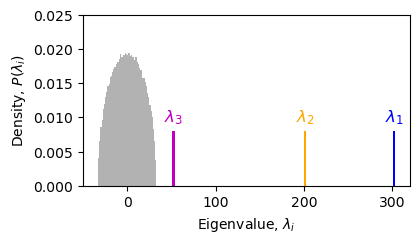

In [27]:
# ---------------------------
# All Eigenvalues
# ---------------------------

fig, ax = plt.subplots(1,1, figsize=(4,2.3))
fig.tight_layout()
colors = ['b', 'orange', 'm']

axis = ax
axis.set_xlabel(f'Eigenvalue, $\\lambda_i$')
axis.set_ylabel(f'Density, $P(\\lambda_i)$')
axis.set_ylim(0, .025)
# axis.set_xlim(-45, 400)

plot_emp_evals_bulk(emp_blk_spct, emp_blk_bins, axis)
# plot_pred_evals_bulk(pred_blk_spct, emp_blk_bins, axis)
plot_emp_evals_isolated(emp_bndry, emp_lambdas[1:], 3, 0.008, axis)
# plot_shading_evals(emp_bndry, emp_lambdas, axis)

plt.savefig(f'../figures/raw/fig4_evals.pdf', bbox_inches='tight')

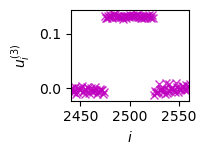

In [29]:
# ---------------------------
# Isolated Eigenvectors
# ---------------------------

# Change to eigenvector needed
i=3

fig, ax = plt.subplots(1,1, figsize=(2,1.5))
fig.tight_layout()
colors = ['b', 'orange', 'm']
xlim = (N/2 - (K+10), N/2 + (K+10))
labels = [r'$u^{(1)}_i$', r'$u^{(2)}_i$', r'$u^{(3)}_i$', ]
vec = emp_evecs[:, -i]
vec = fix_sign(vec)
ax.plot(vec, 'x', color=colors[i-1], alpha=.8)
ax.set_xlim(xlim)
ax.set_xlabel(f'$i$')
ax.set_ylabel(labels[i-1])

plt.savefig(f'../figures/raw/fig4_evec_{i}.pdf', bbox_inches='tight')

